#Example - MovieOntology

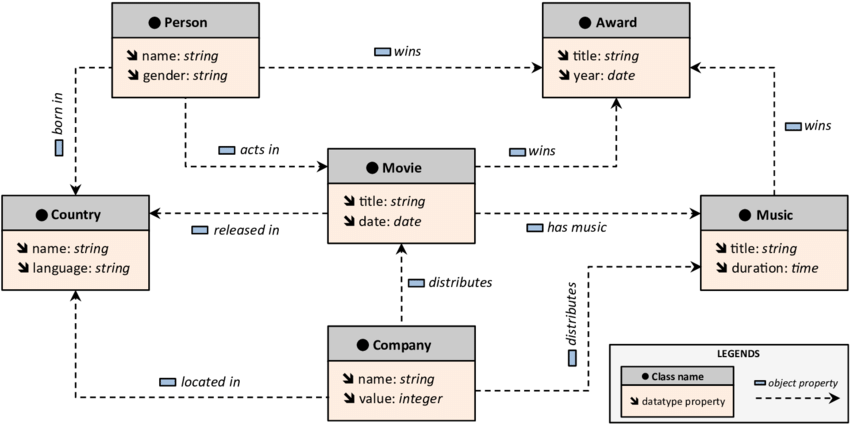

In [1]:
!pip install owlready2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing some packages from owlready

In [1]:
from owlready2 import (
    onto_path, 
    get_ontology, 
    Thing, 
    ObjectProperty, 
    DataProperty,
    FunctionalProperty, 
    Imp, close_world, World
)


In [2]:
import datetime
import pandas as pd

from owlready2.reasoning import sync_reasoner_pellet

#Define your own namespace

In [4]:
onto = get_ontology("http://movie.org/movie") # IRI's are used to identify anything described using the Resource Description Framework (RDF). 

#Creating classes

In [5]:
class Movie(Thing):
  namespace = onto

##Method2
#with onto:
  #class Movie(Thing):
    #pass

In [6]:
#Save the ontology

onto.save("examplemovie.owl")

In [7]:
from owlready2.disjoint import AllDisjoint
#Create more classes

class Person(Thing):
  namespace = onto

class Country(Thing):
  namespace = onto

class Company(Thing):
  namespace = onto

class Film(Thing):
  namespace = onto
  equivalent_to = [Movie]

class Award(Thing):
  namespace = onto

#Create a class Music

#Your code goes here

In [8]:
Film.equivalent_to

[movie.Movie]

In [9]:
#To create subclass

#class subclassEx(Movie): 
 # namespace=onto
 # pass

In [10]:
#To print IRI
print(Movie.iri)

http://movie.org/movie#Movie


#Creating object properties

In [11]:
class wins(ObjectProperty):
  namespace = onto
  domain = [Movie, Person]
  range = [Award]

class hasActor(ObjectProperty):
  namespace = onto
  domain = [Movie]
  range = [Person]

class actsIn(ObjectProperty):
  namespace = onto
  domain  = [Person]
  range = [Movie]
  inverse_property = hasActor

class releasedIn(ObjectProperty):
  namespace = onto
  domain = [Movie]
  range = [Country]

class locatedIn(ObjectProperty):
  namespace = onto
  domain = [Company]
  range = [Country]

class distributes(ObjectProperty):
  namespace = onto
  domain = [Company]
  range = [Movie]

#Create a object property bornIn; identify what could be domain and range values
#Your code goes here

#Create a object property hasMusic; identify what could be domain and range
#Your code goes here


#Creating data properties

Range includes:
*   int
*   float
*   bool
*   str (string)
*   owlready2.normstr (normalized string, a single-line string)
*   owlready2.locstr (localized string, a string with a language associated)
*   datetime.date
*   datetime.time
*   datetime.datetime

In [12]:
class hastitle(DataProperty, FunctionalProperty):
  namespace = onto
  domain = [Movie, Award]
  range = [str]

class releasedDate(DataProperty, FunctionalProperty):
  namespace = onto
  domain = [Movie]
  range = [str]

class filmRate(DataProperty, FunctionalProperty):
  namespace = onto
  domain = [Movie]
  range = [str]

class hasoverallReview(DataProperty, FunctionalProperty):
  namespace = onto
  domain = [Movie]
  range = [str]

class hasname(DataProperty, FunctionalProperty):
  namespace = onto
  domain = [Person, Country, Company]
  range = [str]

class hasgender(DataProperty, FunctionalProperty):
  namespace = onto
  domain = [Person]
  range = [str]

class hasCapital(DataProperty, FunctionalProperty):
  namespace = onto
  domain = [Country]
  range = [str]

class awardYear(DataProperty):
  namespace = onto
  domain = [Award]
  range = [str]

#Create dataproperty genre; identify domain and range



In [13]:
onto.save("movieontology.owl")

#Populating ontology with individuals

In [14]:
df = pd.read_csv("example.csv") 
onto = get_ontology("movieontology.owl").load()

In [15]:
onto_individuals = get_ontology("http://movie.org/movieindividuals")
onto_individuals.imported_ontologies.append(onto)

In [16]:
with onto_individuals:
  Imp(name='rule', namespace=onto).set_as_rule(  """Movie(?m), Award(?a), wins(?m, ?a) -> filmRate(?m, "Hit")""") 
  for row in df.iterrows():
    movietitle, releasedate, personname, persongender,countryname, countrycapital, companyname, awardtitle, awardyear = row[1]

    movieclass = onto.Movie()
    movieclass.hastitle = movietitle
    movieclass.releasedDate = releasedate

    personclass = onto.Person()
    personclass.hasname = personname
    personclass.hasgender = persongender

    countryclass = onto.Country()
    countryclass.hasname = countryname
    countryclass.hasCapital = countrycapital

    companyclass = onto.Company()
    companyclass.hasname = companyname

    if awardtitle:
      awardclass = onto.Award()
      awardclass.hastitle = awardtitle
      awardclass.awardYear.append(awardyear) #when property is not functional use append

    movieclass.wins.append(awardclass)
    movieclass.hasActor.append(personclass)
    movieclass.releasedIn.append(countryclass)
    companyclass.distributes.append(movieclass)

In [17]:
onto_individuals.save("onto_ind.owl")

In [18]:
sync_reasoner_pellet([onto, onto_individuals], infer_property_values = True, infer_data_property_values = True)

* Owlready2 * Running Pellet...
    java -Xmx2000M -cp /usr/local/lib/python3.10/dist-packages/owlready2/pellet/aterm-java-1.6.jar:/usr/local/lib/python3.10/dist-packages/owlready2/pellet/pellet-2.3.1.jar:/usr/local/lib/python3.10/dist-packages/owlready2/pellet/jgrapht-jdk1.5.jar:/usr/local/lib/python3.10/dist-packages/owlready2/pellet/log4j-core-2.19.0.jar:/usr/local/lib/python3.10/dist-packages/owlready2/pellet/jena-core-2.10.0.jar:/usr/local/lib/python3.10/dist-packages/owlready2/pellet/antlr-runtime-3.2.jar:/usr/local/lib/python3.10/dist-packages/owlready2/pellet/slf4j-log4j12-1.6.4.jar:/usr/local/lib/python3.10/dist-packages/owlready2/pellet/log4j-1.2-api-2.19.0.jar:/usr/local/lib/python3.10/dist-packages/owlready2/pellet/slf4j-api-1.6.4.jar:/usr/local/lib/python3.10/dist-packages/owlready2/pellet/antlr-3.2.jar:/usr/local/lib/python3.10/dist-packages/owlready2/pellet/jcl-over-slf4j-1.6.4.jar:/usr/local/lib/python3.10/dist-packages/owlready2/pellet/owlapi-distribution-3.4.3-bin.jar

* Owlready * Adding relation movieindividuals.movie1 filmRate Hit
* Owlready * Adding relation movieindividuals.movie2 filmRate Hit
* Owlready * Adding relation movieindividuals.movie3 filmRate Hit


* Owlready2 * Pellet took 2.3253512382507324 seconds
* Owlready * Equivalenting: movie.Film movie.Movie
* Owlready * Equivalenting: movie.Movie movie.Film
* Owlready * Reparenting Movie(?m), Award(?a), wins(?m, ?a) -> filmRate(?m, 'Hit'): {swrl.Imp} => {owl.Thing}
* Owlready * Reparenting movieindividuals.movie1: {movie.Movie} => {movie.Award, movie.Person, movie.Film, movie.Movie}
* Owlready * Reparenting movieindividuals.award3: {movie.Award} => {movie.Award, movie.Film, movie.Movie}
* Owlready * Reparenting movieindividuals.movie2: {movie.Movie} => {movie.Award, movie.Person, movie.Film, movie.Movie}
* Owlready * Reparenting movieindividuals.movie3: {movie.Movie} => {movie.Award, movie.Person, movie.Film, movie.Movie}
* Owlready * Reparenting movieindividuals.award1: {movie.Award} => {movie.Award, movie.Film, movie.Movie}
* Owlready * Reparenting movieindividuals.award2: {movie.Award} => {movie.Award, movie.Film, movie.Movie}
* Owlready * Reparenting movieindividuals.country2: {movi

#Example 2

In [15]:
onto = get_ontology("http://test.org/drug_qwer.owl")

with onto:
  class Drug(Thing): pass
  class number_of_tablets(Drug >> int, FunctionalProperty): pass
  class price(Drug >> float, FunctionalProperty): pass
  class price_per_tablet(Drug >> float, FunctionalProperty): pass
  rule = Imp()
  rule.set_as_rule("""Drug(?d), price(?d, ?p), number_of_tablets(?d, ?n), divide(?r, ?p, ?n) -> price_per_tablet(?d, ?r)""")

In [16]:
drug = Drug(onto, number_of_tablets = 10, price = 25.0)

In [19]:
sync_reasoner_pellet(infer_property_values = True, infer_data_property_values = True)


* Owlready2 * Running Pellet...
    java -Xmx2000M -cp /usr/local/lib/python3.10/dist-packages/owlready2/pellet/aterm-java-1.6.jar:/usr/local/lib/python3.10/dist-packages/owlready2/pellet/pellet-2.3.1.jar:/usr/local/lib/python3.10/dist-packages/owlready2/pellet/jgrapht-jdk1.5.jar:/usr/local/lib/python3.10/dist-packages/owlready2/pellet/log4j-core-2.19.0.jar:/usr/local/lib/python3.10/dist-packages/owlready2/pellet/jena-core-2.10.0.jar:/usr/local/lib/python3.10/dist-packages/owlready2/pellet/antlr-runtime-3.2.jar:/usr/local/lib/python3.10/dist-packages/owlready2/pellet/slf4j-log4j12-1.6.4.jar:/usr/local/lib/python3.10/dist-packages/owlready2/pellet/log4j-1.2-api-2.19.0.jar:/usr/local/lib/python3.10/dist-packages/owlready2/pellet/slf4j-api-1.6.4.jar:/usr/local/lib/python3.10/dist-packages/owlready2/pellet/antlr-3.2.jar:/usr/local/lib/python3.10/dist-packages/owlready2/pellet/jcl-over-slf4j-1.6.4.jar:/usr/local/lib/python3.10/dist-packages/owlready2/pellet/owlapi-distribution-3.4.3-bin.jar

In [20]:
drug.price_per_tablet